In [8]:
import matplotlib.pyplot as plt
import numpy as np


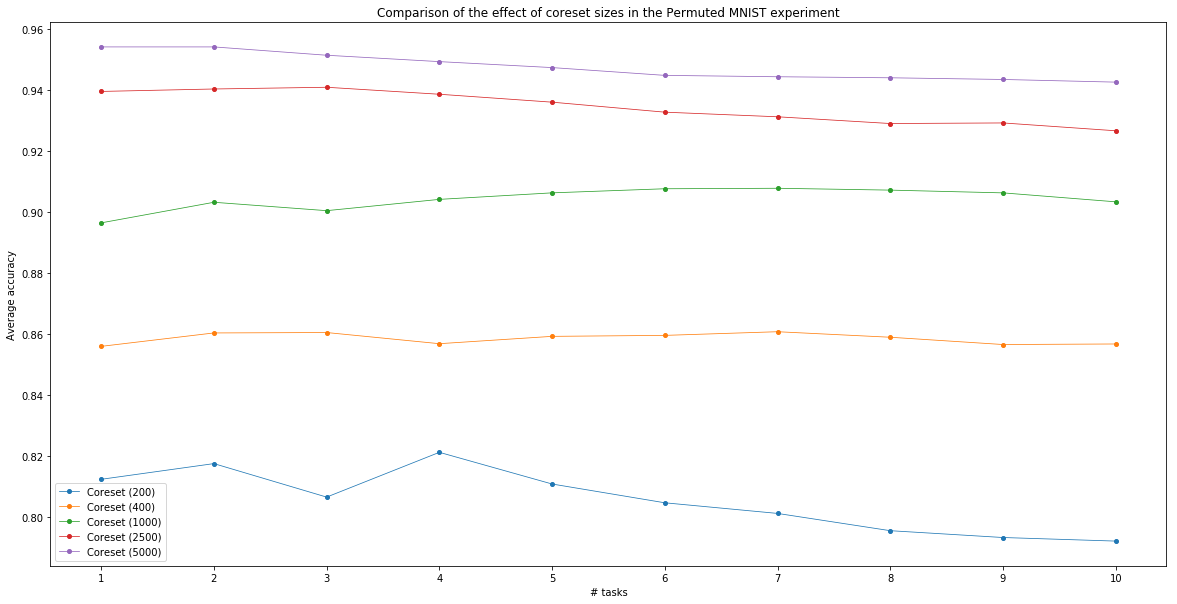

In [10]:
directory = "discriminative/results/"
import glob
directory_files = sorted(glob.glob(directory + "only-coreset-*.npy"))
fig = plt.figure(figsize=(20,10))
ax = plt.gca()

coreset_sizes = []
for file in directory_files:
    coreset_size = file.split("/")[-1].split("-")[-1].split(".")[0]
    coreset_sizes.append(coreset_size)

coreset_sizes = sorted(list(map(int,coreset_sizes)))

for coreset_size in coreset_sizes:
    
    file_name = "only-coreset-{}.npy".format(coreset_size)
    label = 'Coreset ({})'.format(coreset_size)
    acc_file = np.load(directory + file_name)
    acc_mean_file = np.nanmean(acc_file, 1)
    coreset_size = file.split("/")[-1].split("-")[-1].split(".")[0]   
    plt.plot(np.arange(len(acc_mean_file))+1, acc_mean_file, label=label, marker='o')


ax.set_xticks(range(1, len(acc_mean_file)+1))
ax.set_ylabel('Average accuracy')
ax.set_xlabel('# tasks')
ax.legend()
plt.title("Comparison of the effect of coreset sizes in the Permuted MNIST experiment")
plt.show()


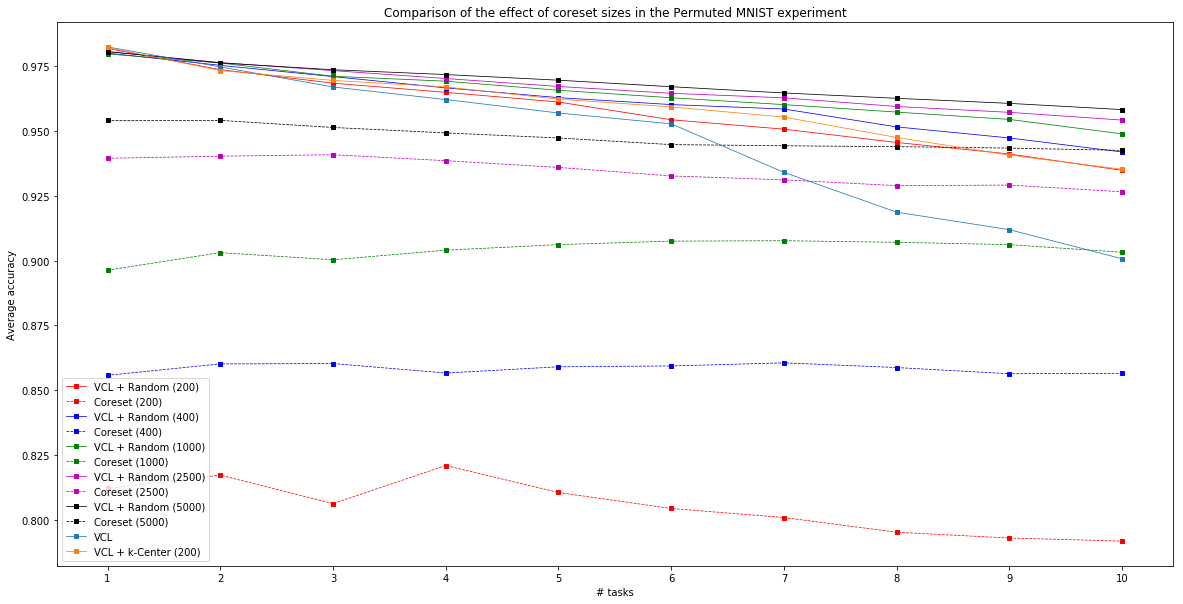

In [11]:
directory = "discriminative/results/"
import glob
directory_files = sorted(glob.glob(directory + "rand-VCL*.npy"))
fig = plt.figure(figsize=(20,10))
ax = plt.gca()

coreset_sizes = []
for file in directory_files:
    coreset_size = file.split("/")[-1].split("-")[-1].split(".")[0]
    coreset_sizes.append(coreset_size)

coreset_sizes = sorted(list(map(int,coreset_sizes)))
color_coresets = ["r","b","g", "m", "black"]
for i, coreset_size in enumerate(coreset_sizes):
    color_coreset  = color_coresets[i]
    file_name = "rand-VCL-{}.npy".format(coreset_size)
    label = 'VCL + Random ({})'.format(coreset_size)
    acc_file = np.load(directory + file_name)
    acc_mean_file = np.nanmean(acc_file, 1)
    plt.plot(np.arange(len(acc_mean_file))+1, acc_mean_file, label=label, color =color_coreset ,marker='s')

    file_coreset_name = "only-coreset-{}.npy".format(coreset_size)
    label_coreset = 'Coreset ({})'.format(coreset_size)
    acc_coreset_file = np.load(directory + file_coreset_name)
    #for i in range(len(acc_coreset_file)):
    #    acc_coreset_file[i] = acc_coreset_file[i] * np.exp(-i/300)
    acc_mean_coreset_file = np.nanmean(acc_coreset_file, 1)
    plt.plot(np.arange(len(acc_mean_coreset_file))+1, acc_mean_coreset_file, label=label_coreset, linestyle = "--", color=color_coreset, marker='s')


file_name = "VCL.npy"
acc_file = np.load(directory + file_name)
acc_mean = np.nanmean(acc_file, 1)
plt.plot(np.arange(len(acc_mean))+1, acc_mean, label="VCL", marker='s')


file_name =  "kcen-VCL-200.npy"
acc_file = np.load(directory + file_name)
acc_mean = np.nanmean(acc_file, 1)
plt.plot(np.arange(len(acc_mean))+1, acc_mean, label="VCL + k-Center (200)", marker='s')
    
ax.set_xticks(range(1, len(acc_mean_file)+1))
ax.set_ylabel('Average accuracy')
ax.set_xlabel('# tasks')
ax.legend()
plt.title("Comparison of the effect of coreset sizes in the Permuted MNIST experiment")
plt.show()


In [12]:
directory = "discriminative/results/"
import glob
directory_files = sorted(glob.glob(directory + "*-split.npy"))
VCL_split = np.load(directory+"VCL-split.npy")
randVCL_split = np.load(directory+"randVCL-split.npy")
kcenVCL_split = np.load(directory+"kcenVCL-split.npy")
kcen_coreset_only_split = np.load(directory+"kcen-coreset-only-split.npy")
print()
rand_coreset_only_split =  np.load(directory+"rand-coreset-only-split.npy")


<Figure size 432x288 with 0 Axes>

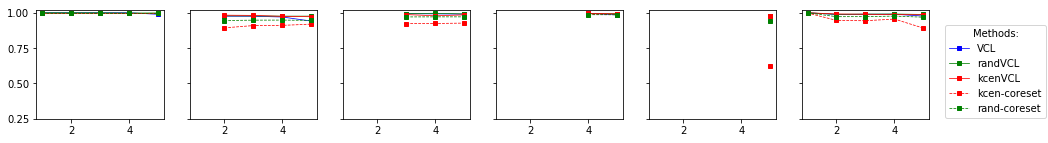

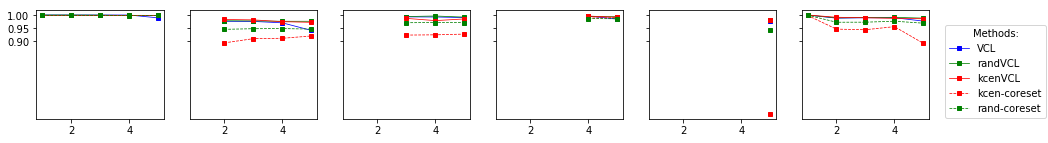

In [13]:
x = np.arange(1,6)
import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['lines.linewidth'] = 0.75

plt.clf()
g, ax1 = plt.subplots(1, 6, figsize=(16,2), sharex=True,
                                                        sharey=True)
h, ax2 = plt.subplots(1, 6, figsize=(16,2), sharex=True,
                                                        sharey=True)
for i in range(5):
    ax1[i].plot(x[i:], VCL_split[i:,i], color = "b", marker = "s")
    ax1[i].plot(x[i:], randVCL_split[i:,i],color = "g", marker = "s")
    ax1[i].plot(x[i:], kcenVCL_split[i:,i], color = "r", marker = "s")
    ax1[i].plot(x[i:], kcen_coreset_only_split[i:,i], color = "r", linestyle="--", marker = "s")
    ax1[i].plot(x[i:], rand_coreset_only_split[i:,i], color = "g", linestyle="--",marker = "s")


    ax2[i].plot(x[i:], VCL_split[i:,i],color = "b", marker = "s")
    ax2[i].plot(x[i:], randVCL_split[i:,i],color = "g", marker = "s")
    ax2[i].plot(x[i:], kcenVCL_split[i:,i], color = "r",marker = "s")
    ax2[i].plot(x[i:], kcen_coreset_only_split[i:,i], color = "r", linestyle="--", marker = "s")
    ax2[i].plot(x[i:], rand_coreset_only_split[i:,i], color = "g", linestyle="--",marker = "s")
    
ax1[-1].plot(x, np.nanmean(VCL_split,1), color = "b", marker = "s")
ax1[-1].plot(x, np.nanmean(randVCL_split,1), color = "g", marker = "s")
ax1[-1].plot(x, np.nanmean(kcenVCL_split,1), color = "r", marker = "s")
ax1[-1].plot(x, np.nanmean(kcen_coreset_only_split,1),color = "r", linestyle="--",marker = "s")
ax1[-1].plot(x, np.nanmean(rand_coreset_only_split,1), color = "g", linestyle="--", marker = "s")

ax2[-1].plot(x, np.nanmean(VCL_split,1), color = "b", marker = "s")
ax2[-1].plot(x, np.nanmean(randVCL_split,1), color = "g", marker = "s")
ax2[-1].plot(x, np.nanmean(kcenVCL_split,1), color = "r", marker = "s")
ax2[-1].plot(x, np.nanmean(kcen_coreset_only_split,1),color = "r", linestyle="--",marker = "s")
ax2[-1].plot(x, np.nanmean(rand_coreset_only_split,1), color = "g", linestyle="--", marker = "s")

#plt.figlegend(["VCL", "randVCL", "kcenVCL"],loc = "upper center")




for i in range(6):
    ax1[i].set_yticks(np.arange(0.25, 1.25, 0.25))
    ax2[i].set_yticks(np.arange(0.90, 1.01, 0.05))
    
g.legend(   # The line objects
           labels=["VCL", "randVCL", "kcenVCL", "kcen-coreset", "rand-coreset"],   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.3,    # Small spacing around legend box
           title="Methods:"  # Title for the legend
           )
h.legend(   # The line objects
           labels=["VCL", "randVCL", "kcenVCL", "kcen-coreset", "rand-coreset"],   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.3,    # Small spacing around legend box
           title="Methods:"  # Title for the legend
           )


